In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io, color, img_as_float, img_as_int, img_as_ubyte, exposure

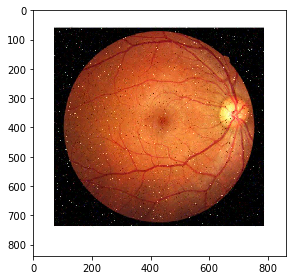

In [2]:
# Original
im = io.imread('0_eye.jpg')
io.imshow(im)

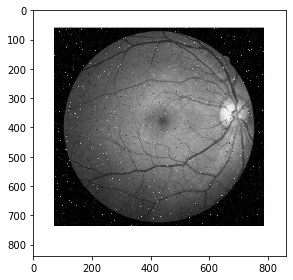

In [3]:
# Grayscale
imggray=color.rgb2gray(im)
gray = img_as_ubyte(imggray)
io.imshow(gray)

Text(0.5, 1.0, 'Radius = 35')

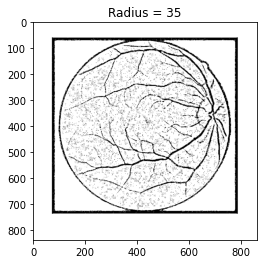

In [5]:
# Black & White
from skimage.filters import threshold_local
block_size = 35
local_thresh = threshold_local(gray, block_size, offset=10)
binary_local = gray > local_thresh
plt.imshow(binary_local, cmap=plt.cm.gray)
plt.title('Radius = %d' % block_size)

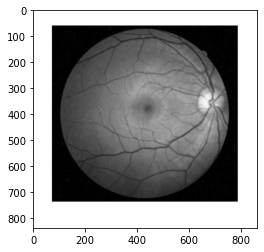

In [7]:
# Median Filter
from skimage.filters.rank import median
from skimage.morphology import disk
plt.imshow(median(gray, disk(1)), vmin=0, vmax=255, cmap=plt.cm.gray)

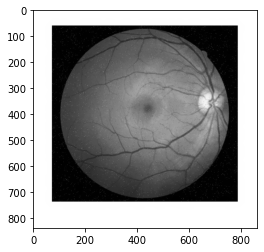

In [8]:
# Mean Filter
from skimage.filters.rank import mean_bilateral
bilat = mean_bilateral(gray.astype(np.uint16), disk(20), s0=10, s1=10)
plt.imshow(bilat, cmap=plt.cm.gray)

Text(0.5, 1.0, 'Canny filter, $\\sigma=2$')

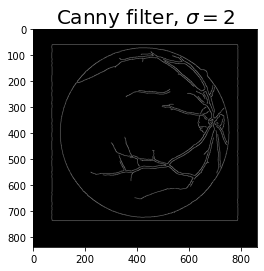

In [9]:
# Canny
from skimage.feature import canny
edges = canny(gray/255., sigma =2)
plt.imshow(edges, cmap='gray')
plt.title(r'Canny filter, $\sigma=2$', fontsize=20)

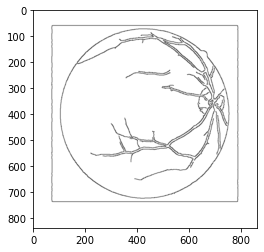

In [10]:
# Sobel
from skimage import filters
from skimage.filters import sobel
def sobel_hsv(image):
    return filters.sobel(image)
sobele = (1 - sobel_hsv(edges))
plt.imshow(sobele, cmap='gray')

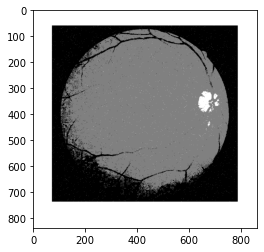

In [11]:
# Threshold Multiotsu
thresholds = filters.threshold_multiotsu(gray, classes=3)
regions = np.digitize(gray, bins=thresholds)
plt.imshow(regions, cmap='gray')